# Logistic Regression

![](https://www.researchgate.net/profile/Shibani_Singh2/publication/321141639/figure/fig2/AS:572731935727616@1513561342872/Schematic-of-Rosenblatts-perceptron.png)

The main difference is that, in the `logistic regression` model, we will use an activation function known as `Sigmoid`.

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

This function will receive as input a vector with the output of our perceptron for certain input data and will convert it into a probability (a value between $0$ and $1$).

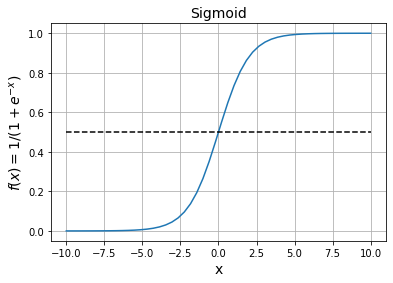

In [1]:
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10)
y = 1. / (1. + np.exp(-x))

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('$f(x) = 1/(1 + e^{-x})$', fontsize=14)
plt.title('Sigmoid', fontsize=14)
plt.plot(x, np.full(len(x), 0.5), '--k')
plt.show()

# Loss Function for Logistic Regression
Binary Cross Entropy or Log Loss

$$ J(\mathbf{w}) = - \frac{1}{N} \sum^{N}_{j=1} \left[ y^{(j)} log(\hat{y}^{(j)}) + (1-y^{(j)})log(1-\hat{y}^{(j)})\right] $$

$$ \frac{\partial J}{\partial w_i} =  \frac{1}{N} \sum^{N}_{j=1} (\sigma(\mathbf{w} \cdot \mathbf{x}^{(i)}) - y^{(i)})x^{(j)}_i $$

In [3]:
# Loss function

def mse(y, y_hat):
    return np.mean((y_hat - y)**2)

def bce(y, y_hat):
    return - np.mean(y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat))

# Activation functions

def linear(x):
    return x

def step(x):
    return x > 0

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Perceptron

class Perceptron():
  def __init__(self, size, activation, loss):
    self.w = np.random.randn(size) 
    self.ws = []
    self.activation = activation
    self.loss = loss
    
  def __call__(self, w, x):
    return self.activation(np.dot(x, w)) 

  def fit(self, x, y, epochs, lr):
    x = np.c_[np.ones(len(x)), x]
    for epoch in range(epochs):
        # Batch Gradient Descent
        y_hat = self(self.w, x)
        # loss function
        l = self.loss(y, y_hat)
        # derivatives
        dldh = (y_hat - y)
        dhdw = x
        dldw = np.dot(dldh, dhdw)
        # update weights
        self.w = self.w - lr*dldw
        # save weights for animation
        self.ws.append(self.w.copy())

# Dataset

C:\Users\Killer\AppData\Local\Temp\ipykernel_30500\4225520755.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


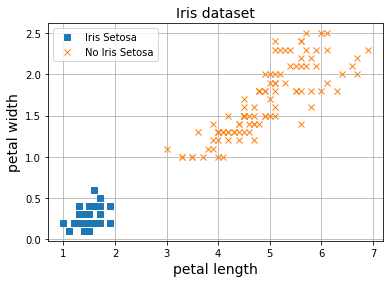

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

plt.plot(X[y==1, 0], X[y==1, 1], 's', label="Iris Setosa")
plt.plot(X[y==0, 0], X[y==0, 1], 'x', label="No Iris Setosa")
plt.grid()
plt.legend()
plt.xlabel('petal length', fontsize=14)
plt.ylabel('petal width', fontsize=14)
plt.title("Iris dataset", fontsize=14)
plt.show()

In [7]:
np.random.seed(42)

perceptron = Perceptron(3, sigmoid, bce)
epochs, lr = 20, 0.01
perceptron.fit(X, y, epochs, lr)

from matplotlib import animation, rc
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
rc('animation', html='html5')

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, autoscale_on=False)
def plot(i, axes = [0, 5, 0, 2], label="Iris Setosa"):
    ax.clear()
    w = perceptron.ws[i]
    tit = ax.set_title(f"Epoch {i+1}", fontsize=14)
    x0, x1 = np.meshgrid(
            np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
            np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    X_new = np.c_[np.ones(len(X_new)), X_new] 
    y_predict = perceptron(w, X_new)
    zz = y_predict.reshape(x0.shape)
    ax.plot(X[y==0, 0], X[y==0, 1], "bs", label=f"No {label}")
    ax.plot(X[y==1, 0], X[y==1, 1], "yo", label=label)
    ax.contourf(x0, x1, zz, cmap=custom_cmap)
    ax.set_xlabel("Petal length", fontsize=14)
    ax.set_ylabel("Petal width", fontsize=14)
    ax.legend(loc="lower right", fontsize=14)
    ax.axis(axes)
    return ax

anim = animation.FuncAnimation(fig, plot, frames=epochs, interval=200)
plt.close()
anim

In [8]:
# last weights
w = perceptron.ws[-1]
w

array([ 3.1121193 , -1.14317047, -0.70370935])

In [16]:
# new prediction (probability)

x_new = [1, 2, 0.5]
y_pred = perceptron(w, x_new)
print (f"Probability of being Iris Setosa: {y_pred*100:.2f}%, is Iris Setosa")

x_new = [1, 1, 0.5]
y_pred = perceptron(w, x_new)
print (f"Probability of being Iris Setosa: {y_pred*100:.2f}%, is Iris Setosa")

x_new = [1, 3, 0.5]
y_pred = perceptron(w, x_new)
print (f"Probability of being Iris Setosa: {y_pred*100:.2f}%, is not Iris Setosa")

x_new = [1, 4, 0.5]
y_pred = perceptron(w, x_new)
print (f"Probability of being Iris Setosa: {y_pred*100:.2f}%, is not Iris Setosa")

Probability of being Iris Setosa: 61.63%, is Iris Setosa
Probability of being Iris Setosa: 83.44%, is Iris Setosa
Probability of being Iris Setosa: 33.87%, is not Iris Setosa
Probability of being Iris Setosa: 14.03%, is not Iris Setosa


# Limitations

The `logistic regression` model continues to have the same limitations that we find in all the `Perceptron` applications, and that is that it will not be able to provide a good solution when our data is not easily separable by a straight line.

C:\Users\Killer\AppData\Local\Temp\ipykernel_30500\2870531155.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 1).astype(np.int)


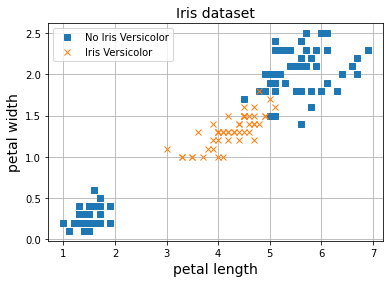

In [17]:
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 1).astype(np.int)

plt.plot(X[y==0, 0], X[y==0, 1], 's', label="No Iris Versicolor")
plt.plot(X[y==1, 0], X[y==1, 1], 'x', label="Iris Versicolor")
plt.grid()
plt.legend()
plt.xlabel('petal length', fontsize=14)
plt.ylabel('petal width', fontsize=14)
plt.title("Iris dataset", fontsize=14)
plt.show()

In [18]:
np.random.seed(20)

perceptron = Perceptron(3, sigmoid, bce)
epochs, lr = 40, 0.01
perceptron.fit(X, y, epochs, lr)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, autoscale_on=False)
def plot(i, axes = [0.5, 7.3, 0, 2.8], label="Iris Versicolor"):
    ax.clear()
    w = perceptron.ws[i]
    tit = ax.set_title(f"Epoch {i+1}", fontsize=14)
    x0, x1 = np.meshgrid(
            np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
            np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    X_new = np.c_[np.ones(len(X_new)), X_new] 
    y_predict = perceptron(w, X_new)
    zz = y_predict.reshape(x0.shape)
    ax.plot(X[y==0, 0], X[y==0, 1], "bs", label=f"No {label}")
    ax.plot(X[y==1, 0], X[y==1, 1], "yo", label=label)
    ax.contourf(x0, x1, zz, cmap=custom_cmap)
    ax.set_xlabel("Petal length", fontsize=14)
    ax.set_ylabel("Petal width", fontsize=14)
    ax.legend(loc="lower right", fontsize=14)
    ax.axis(axes)
    return ax

anim = animation.FuncAnimation(fig, plot, frames=epochs, interval=200)
plt.close()
anim